# Cubic Template
## Generate a Cubic Lattice based on an Arbitrary Shape

The CubicLattice class takes a boolean array (i.e. an image) as input and trims all pores where the image is ``False``.  This allows for the creation of networks with arbitrary external shapes, such as spheres.

As usual start by importing Scipy and OpenPNM:

In [1]:
import scipy as sp
import numpy as np
import openpnm as op
%config InlineBackend.figure_formats = ['svg']
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(10)
wrk = op.Workspace()  # Initialize a workspace object
wrk.settings['loglevel'] = 50

First Let's create an image of an annulus.  There are two helper methods in the ``topotools`` module for creating templates of spheres and cylinders, which are common options.

In [2]:
im = op.topotools.template_cylinder_annulus(10, 8, 4)
net = op.network.CubicTemplate(im)

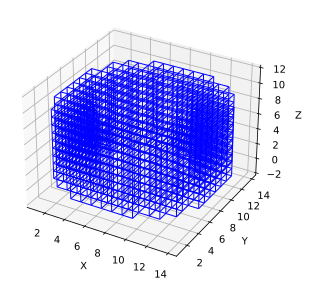

In [3]:
fig = op.topotools.plot_connections(net)

Of course you can create any shape that you desire, just be definining your own template:

In [4]:
im = np.random.rand(40, 40, 1) > 0.3
net = op.network.CubicTemplate(im)

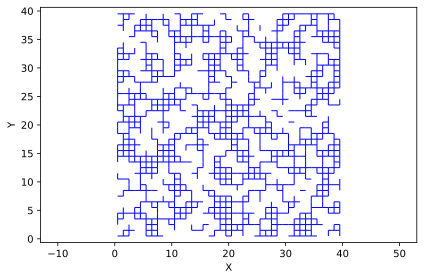

In [5]:
fig = op.topotools.plot_connections(net)

In the above image you can see that some pores are isolated from the main network, which is very problematic for transport simulations (i.e. singular matrices).  You can check the network health, and trim the suggested pores as follows:

In [6]:
h = net.check_network_health()
print(h)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
Key                                 Value
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
headless_throats                    []
looped_throats                      []
isolated_pores                      [26, 37, 63, 107, 248, 307, 398, 623, 680, 712, 738, 765, 835, 891, 1000]
disconnected_pores                  [0, 26, 27, 28, 29, 30, 37, 55, 56, 57, 58, 59, 60, 61, 63, 85, 86, 87, 107, 113, 248, 307, 357, 358, 382, 398, 404, 405, 431, 514, 546, 547, 577, 623, 680, 710, 711, 712, 738, 755, 765, 781, 782, 805, 831, 835, 857, 878, 891, 905, 1000, 1012, 1013, 1043, 1044, 1071, 1072, 1073]
duplicate_throats                   []
bidirectional_throats               []
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


In [7]:
op.topotools.trim(network=net, pores=h['trim_pores'])

KeyError: 'trim_pores'

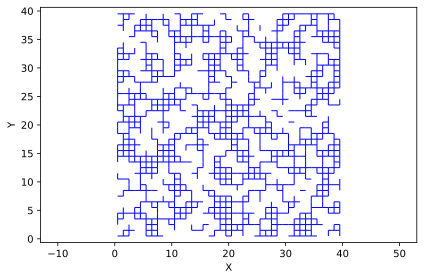

In [8]:
fig = op.topotools.plot_connections(net)